### Image Classification
*notes*

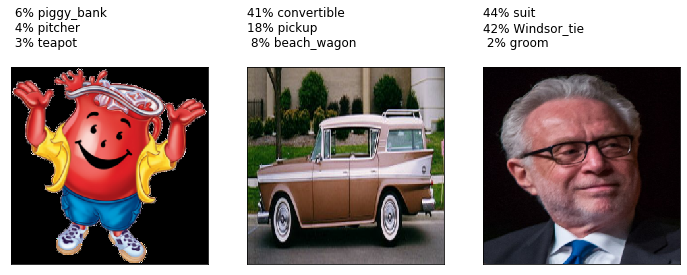

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt

def get_tensor_from_image_url(url):
    path   = tf.keras.utils.get_file(url.split('/')[-1], url);
    image  = tf.image.decode_image(tf.io.read_file(path), dtype=tf.float32, channels=3);
    image  = tf.image.resize(image, (299,299))
    image  = tf.expand_dims(image, 0)
    return image

image_urls = [
    "https://upload.wikimedia.org/wikipedia/en/c/c7/Kool-Aid_Man.png",
    "https://upload.wikimedia.org/wikipedia/commons/thumb/3/30/1958_Ambassador_4-d_hardtop_wagon_1.JPG/400px-1958_Ambassador_4-d_hardtop_wagon_1.JPG", 
    "https://upload.wikimedia.org/wikipedia/commons/thumb/7/76/Wolf_Blitzer_2015.jpg/440px-Wolf_Blitzer_2015.jpg"
]
    
model  = tf.keras.applications.InceptionV3()
decode = tf.keras.applications.inception_v3.decode_predictions

def predict(image):
    prediction_tensor = model.predict(image);
    prediction_blob   = decode(prediction_tensor)[0][0:3];
    return ''.join(['{:2.0f}% {:20s}\n'.format(100*i[2],i[1]) for i in prediction_blob]);

fig, ax = plt.subplots(1,len(image_urls), figsize=(12,5), subplot_kw={'xticks':[], 'yticks':[]});

for idx, img_url in enumerate(image_urls):
    T = get_tensor_from_image_url(img_url)
    ax[idx].imshow(T[0,:,:,:])
    ax[idx].set_title(predict(T), loc='left')

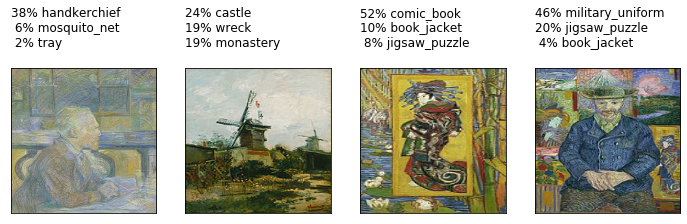

In [4]:
import bs4
import urllib

html_page = urllib.request.urlopen("https://en.wikipedia.org/wiki/Vincent_van_Gogh");
html_soup = bs4.BeautifulSoup(html_page);

fig, ax = plt.subplots(1,4, figsize=(12,5), subplot_kw={'xticks':[], 'yticks':[]})

for idx, img in enumerate(html_soup.findAll('img')[16:20]):
    url = 'http:' + img.get('src')
    tensor = get_tensor_from_image_url(url)
    ax[idx].imshow(tensor[0,:,:,:])
    ax[idx].set_title(predict(tensor), loc='left')